In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configurar estilo de Seaborn
sns.set_theme(style="darkgrid")

# Ruta al archivo de periodograma (ajustar según tu archivo)
archivo_periodograma = "periodogramas/datos1_periodograma.csv"

# Cargar los datos del archivo
periodograma = pd.read_csv(archivo_periodograma)

# Calcular los períodos en minutos
periodograma['periodo'] = 1 / periodograma['frecuencia']

# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=periodograma['periodo'], 
    y=periodograma['potencia'], 
    color='blue', 
    linewidth=2, 
    label="Potencia"
)

# Etiquetas y título
plt.xlabel("Período (minutos)", fontsize=14)
plt.ylabel("Potencia", fontsize=14)
plt.title("Periodograma de Lomb-Scargle", fontsize=16)

# Ajustar los ticks del eje x
plt.xticks(
    np.linspace(periodograma['periodo'].min(), periodograma['periodo'].max(), 10), 
    rotation=45, 
    fontsize=12
)

# Agregar leyenda
plt.legend(loc="upper right", fontsize=12)

# Mostrar gráfica
plt.tight_layout()  # Ajusta el diseño para evitar cortes
plt.show()

# Paralelizar el cálculo
num_cores = cpu_count() - 1
with Pool(processes=num_cores) as pool:
    resultados = pool.map(calcular_periodograma, lista_archivos)

# Guardar los resultados generales
output_file = "resultados.txt"
resumen_file = "resumen.txt"

output_data = pd.DataFrame({
    'archivo': [res['archivo'] for res in resultados],
    'periodicidad_maxima_minutos': [
        res['periodo_maximo'] if res['mensaje'] is None else "NA" for res in resultados
    ],
    'poder_maximo': [
        res['poder_maximo'] if res['mensaje'] is None else "NA" for res in resultados
    ],
    'intervalo_confianza': [
        res['intervalo_confianza'] if res['mensaje'] is None else "NA" for res in resultados
    ],
    'significativo': [
        res['significativo'] if res['mensaje'] is None else "NA" for res in resultados
    ]
})

output_data.to_csv(output_file, sep='\t', index=False, header=True)

# Generar el resumen
resumen_lines = []
for res in resultados:
    if res['mensaje'] is None:
        resumen_lines.append(
            f"Archivo: {res['archivo']}\n"
            f"  Período Máximo: {res['periodo_maximo']:.2f} minutos\n"
            f"  Poder Máximo: {res['poder_maximo']:.4f}\n"
            f"  Intervalo de Confianza: {res['intervalo_confianza']}\n"
            f"  Significativo: {'Sí' if res['significativo'] else 'No'}\n"
        )
    else:
        resumen_lines.append(f"Archivo: {res['archivo']}\n  Error: {res['mensaje']}\n")

with open(resumen_file, "w") as resumen:
    resumen.write("\n".join(resumen_lines))


/home/wattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


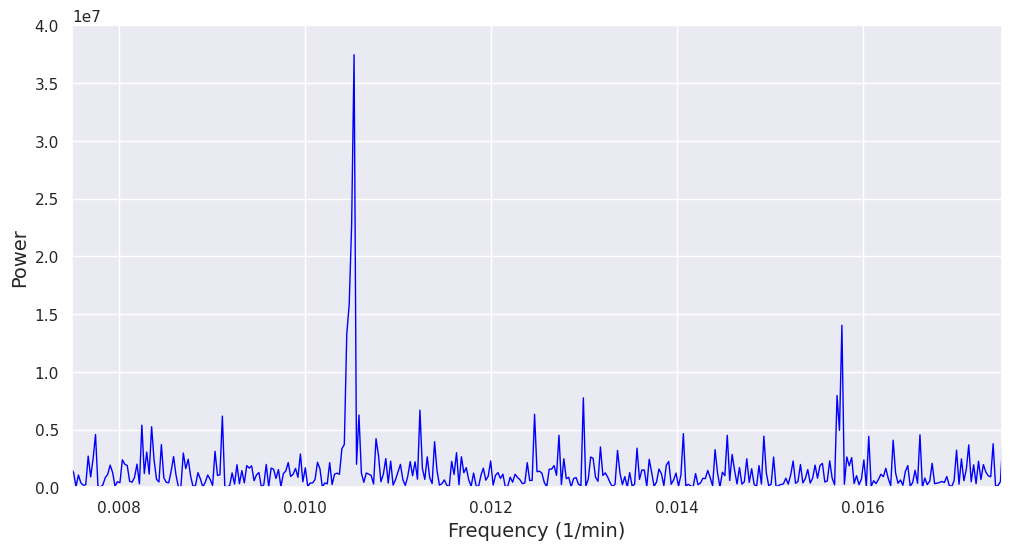

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de Seaborn
sns.set_theme(style="darkgrid")

# Ruta al archivo de periodograma (ajustar según tu archivo)
archivo_periodograma = "sagA-clean-gamma_periodograma.csv"

# Cargar los datos del archivo
periodograma = pd.read_csv(archivo_periodograma)

# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=periodograma['frecuencia'], 
    y=periodograma['potencia'], 
    color='blue', 
    linewidth=1, 
 #   label="Potencia"
)

# Etiquetas y título
plt.xlabel("Frequency (1/min)", fontsize=14)
plt.ylabel("Power", fontsize=14)
#plt.title("Periodograma de Lomb-Scargle", fontsize=16)
plt.xlim(0.0075,0.0175)
plt.ylim(0,4e7)
# Agregar leyenda
# plt.legend(loc="upper right", fontsize=12)

plt.savefig("images/lombScargle_periodogram_serie_1.png", format='png', dpi=300)
# Mostrar gráfica
plt.show()
